Step 1 필요한 모듈 불러오기

In [1]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분

# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# %matplotlib qt5

Step 2 pandas로 csv파일 읽기

각 항목별 데이터 

#age - 나이
#sex - (1 = 남성; 0 = 여성)
#cp - 가슴 통증 유형(0, 1, 2, 3, 4)
#trestbps - 안정 혈압(병원 입원시 mm Hg)
#chol - 혈청 콜레스테롤(mg/dl)
#fbs - (공복 혈당 > 120 mg/dl)(1 = true; 0 = false)
#restecg - 안정 심전도 결과(0, 1, 2)
#thalach - 최대 심박동수
#exang - 협심증 유발 운동(1 = yes; 0 = no)
#oldpeak - 비교적 안정되기까지 운동으로 유발되는 ST depression
#slope - 최대 운동 ST segment의 기울기
#ca - 형광 투시된 주요 혈관의 수(0-3)
#thal - (3 = 보통; 6 = 해결된 결함; 7 = 해결가능한 결함)
#target - 심장병 진단(1 = true; 0 = false)

In [2]:
df = pd.read_csv('C:/ai/dataset/heart.csv',
               names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope","ca","thal","class"])

In [3]:
df = df.drop(0,0)
# 0번째 항은 제목이 반복돼 제거하기

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#데이터 타입이 object형이기에 int와 float형으로 바꿔야 상관계수분석 가능
df= df.apply(pd.to_numeric,errors='coerce').fillna(0)

In [6]:
df.info()
# 데이터의 전반적인 정보를 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  class     303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


Step 3 seaborn을 이용해 상관계수 그래프 그리기

bottome : 14.0 top : 0.0


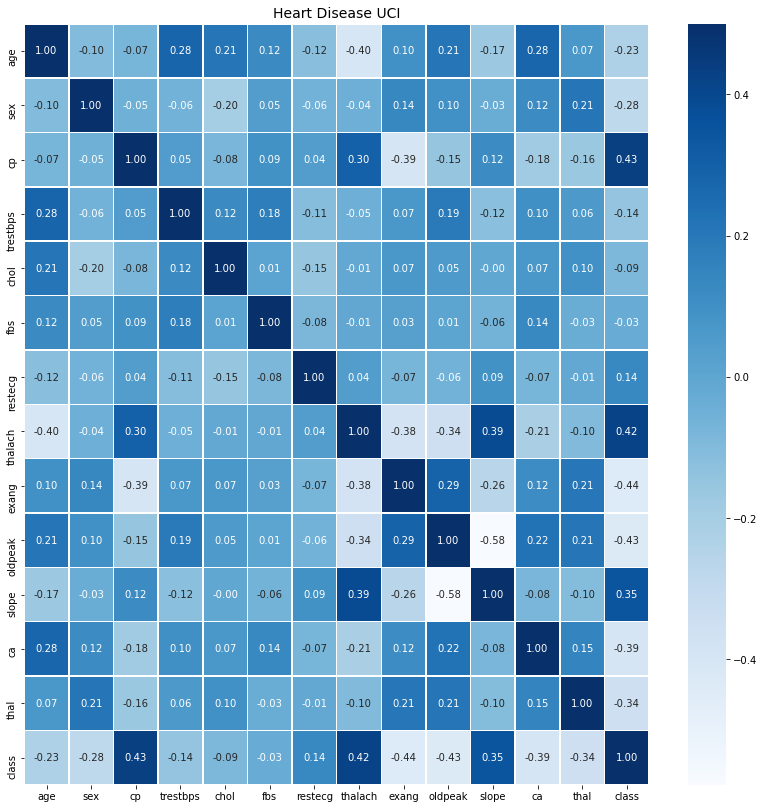

In [7]:
plt.figure(figsize=(14,14))   #그래프의 크기를 정합니다.
plt.title('Heart Disease UCI', fontsize=14)

#heat_4 의 현재 축을 확인
heat_4 = sns.heatmap(df.corr(), cmap='Blues', linewidths=0.5, vmax=0.5,  fmt = '.2f' , annot=True)

#heat_4 의 top 그리고 bottom 을 출력 
bottom, top = heat_4.get_ylim()
print("bottome :", bottom, "top :", top)


Step 4 그래프를 통해 thalach(최대 심박동수)가 class와 연관이 깊은 것을 알 수 있음. cp는 가슴 통증 유형이기에 유형과는 상관관계가 높더라도 관련이 없는 것임. 그렇기에 thalach와 calss 항목만 따로 뗴어 두 항목 간의 관계를 다시 확인하는 과정을 거칠 예정

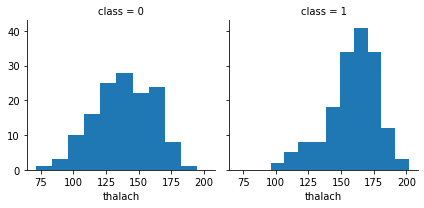

In [8]:
grid = sns.FacetGrid(df, col='class') # col='class' -> class를 0과 1의 column으로 분리하여 히스토그램으로 쌓는다.

grid.map(plt.hist, 'thalach', bins=10)  
plt.show()

이는 최대 심박동수가 150이상일 경우(class=1 그래프) 심장병인 사람이 많다는 것을 유추할 수 있다.